  Predicting Result of the Match Using LSTM (Long short Term Memory)

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input,LSTM,SimpleRNN
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('ODI_Match_Results.csv')

### Removing Unwanted columns

In [ ]:
df=df.drop(['Unnamed: 0','BR','Start Date'],axis=1)

In [ ]:
df.head(50)

,Result,Margin,Toss,Bat,Opposition,Ground,Match_ID,Country,Country_ID
0,won,85 runs,lost,1st,v India,Kolkata,ODI # 3315,Pakistan,7
1,lost,85 runs,won,2nd,v Pakistan,Kolkata,ODI # 3315,India,6
2,lost,10 runs,lost,2nd,v India,Delhi,ODI # 3316,Pakistan,7
3,won,10 runs,won,1st,v Pakistan,Delhi,ODI # 3316,India,6
4,lost,107 runs,lost,2nd,v Australia,Melbourne,ODI # 3317,SriLanka,8
5,won,107 runs,won,1st,v Sri Lanka,Melbourne,ODI # 3317,Australia,2
6,lost,9 runs,lost,2nd,v England,Rajkot,ODI # 3318,India,6
7,won,9 runs,won,1st,v India,Rajkot,ODI # 3318,England,1
8,won,8 wickets,won,2nd,v Australia,Adelaide,ODI # 3319,SriLanka,8
9,lost,8 wickets,lost,1st,v Sri Lanka,Adelaide,ODI # 3319,Australia,2


### Removing the records with no match results

In [ ]:
df=df[~(df['Result'] == 'n/r')]
df=df[~(df['Result'] == 'aban')]
df=df[~(df['Result'] == 'tied')]
df=df[~(df['Result'] == 'canc')]
df=df[~(df['Result'] == '-')]

In [ ]:
df.reset_index(inplace=True)
df=df.drop(['index'],axis=1)

### Cleaning the data

In [ ]:
df['Match_ID'] = df['Match_ID'].str.replace('ODI #', '')
df['Opposition'] = df['Opposition'].str.replace('v ', '')
df['Bat'] = df['Bat'].str.replace('st', '')
df['Bat'] = df['Bat'].str.replace('nd', '')

In [ ]:
df.head(50)

,Result,Margin,Toss,Bat,Opposition,Ground,Match_ID,Country,Country_ID
0,won,85 runs,lost,1,India,Kolkata,3315,Pakistan,7
1,lost,85 runs,won,2,Pakistan,Kolkata,3315,India,6
2,lost,10 runs,lost,2,India,Delhi,3316,Pakistan,7
3,won,10 runs,won,1,Pakistan,Delhi,3316,India,6
4,lost,107 runs,lost,2,Australia,Melbourne,3317,SriLanka,8
5,won,107 runs,won,1,Sri Lanka,Melbourne,3317,Australia,2
6,lost,9 runs,lost,2,England,Rajkot,3318,India,6
7,won,9 runs,won,1,India,Rajkot,3318,England,1
8,won,8 wickets,won,2,Australia,Adelaide,3319,SriLanka,8
9,lost,8 wickets,lost,1,Sri Lanka,Adelaide,3319,Australia,2


In [ ]:
sns.heatmap(df.corr(), annot=True)

#### Factorizing the home team and opossition in such a way that same label is encoded to the same team (India should be 0 in both opposition and home team)

In [ ]:
f = pd.factorize(df[['Opposition','Country']].stack().drop_duplicates().sort_index(level=1))
s1 = pd.Series(f[0], index=f[1])
df=df.assign(**df.apply(lambda x: x.map(s1)).add_suffix('_ID'))

In [ ]:
df=df.drop(['Result_ID','Margin_ID','Toss_ID','Bat_ID','Ground_ID','Match_ID_ID','Country_ID_ID'],axis=1)

### Factorizing other attributes of the data

In [ ]:
ground_factorized,ground_categories = pd.factorize(df['Ground'])
toss_factorized,toss_categories = pd.factorize(df['Toss'])
result_factorized,result_categories = pd.factorize(df['Result'])

In [ ]:
df['Ground'] = ground_factorized
df['Toss'] = toss_factorized
df['Result'] = result_factorized
arr = df['Country_ID'].to_numpy()
arr1=df['Opposition_ID'].to_numpy()
print(result_categories)

Index(['won', 'lost'], dtype='object')


In [ ]:
df=df.drop(['Margin','Country','Opposition'],axis=1)

In [ ]:
df.head(100)

,Result,Toss,Bat,Ground,Match_ID,Country_ID,Opposition_ID
0,0,0,1,0,3315,0,6
1,1,1,2,0,3315,6,0
2,1,0,2,1,3316,0,6
3,0,1,1,1,3316,6,0
4,1,0,2,2,3317,1,7
...,...,...,...,...,...,...,...
95,1,0,1,37,3375,2,9
96,0,1,2,37,3375,9,11
97,1,0,1,36,3376,1,6
98,0,1,2,36,3376,6,8


### Here we are taking toss , ground on which the match is played Home team and opposition. We have taking result as our output variable so we could classify if the team has won or lost the match

In [ ]:
X = np.zeros((np.shape(arr)[0],4))
X[:,0] = toss_factorized
X[:,1] = ground_factorized
X[:,2] = arr
X[:,3] = arr1
print(X.shape)
print(result_factorized.shape)
print(type(X))
print(type(result_factorized))
print(X.shape)
print(X)
print(result_factorized)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))
print(X.shape)

(1225, 4)
(1225,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1225, 4)
[[ 0.  0.  0.  6.]
 [ 1.  0.  6.  0.]
 [ 0.  1.  0.  6.]
 ...
 [ 1. 45. 15. 12.]
 [ 0. 35.  0.  9.]
 [ 1. 35.  9.  0.]]
[0 1 1 ... 0 1 0]
(1225, 1, 4)


### Here for the Sequential model we have 2 LSTM model and 2 dense layer were added further with last dense layer having signoid functiod as activator working as output layer (LSTM)

In [ ]:
tf.random.set_seed(101)
model1 = Sequential()
model1.add(LSTM(128,activation="relu",input_shape = (1,4),return_sequences=True))
model1.add(LSTM(128, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 1, 128)            68096     
                                                                 
 lstm_5 (LSTM)               (None, 128)               131584    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 216321 (845.00 KB)
Trainable params: 216321 (845.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#plot_model(model1)

In [ ]:
history = model1.fit(X,result_factorized,epochs=50,validation_split=0.33)

Epoch 1/50
26/26 [==============================] - 5s 49ms/step - loss: 0.6917 - accuracy: 0.5341 - val_loss: 0.6891 - val_accuracy: 0.5358
Epoch 2/50
26/26 [==============================] - 1s 23ms/step - loss: 0.6875 - accuracy: 0.5439 - val_loss: 0.6851 - val_accuracy: 0.5358
Epoch 3/50
26/26 [==============================] - 1s 29ms/step - loss: 0.6815 - accuracy: 0.5439 - val_loss: 0.6785 - val_accuracy: 0.5358
Epoch 4/50
26/26 [==============================] - 1s 20ms/step - loss: 0.6758 - accuracy: 0.5439 - val_loss: 0.6764 - val_accuracy: 0.5358
Epoch 5/50
26/26 [==============================] - 1s 22ms/step - loss: 0.6721 - accuracy: 0.5500 - val_loss: 0.6740 - val_accuracy: 0.5481
Epoch 6/50
26/26 [==============================] - 1s 27ms/step - loss: 0.6704 - accuracy: 0.5744 - val_loss: 0.6730 - val_accuracy: 0.5654
Epoch 7/50
26/26 [==============================] - 1s 25ms/step - loss: 0.6674 - accuracy: 0.5805 - val_loss: 0.6744 - val_accuracy: 0.5728
Epoch 8/50
26

### Here for the Sequential model we have 2 LSTM model with drop out set to 0.5 for regularization and reduce overfitting and 2 dense layer were added further with last dense layer having signoid functiod as activator working as output layer (Regularized LSTM)

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input,LSTM,SimpleRNN,GRU
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
tf.random.set_seed(101)
import matplotlib.pyplot as plt
model = Sequential()
model.add(LSTM(128,activation="sigmoid",input_shape = (1,4),return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(128, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 1, 128)            68096     
                                                                 
 dropout_2 (Dropout)         (None, 1, 128)            0         
                                                                 
 lstm_7 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 216321 (845.00 KB)
Trainable params: 216

### We have fitted the model below without batch size as the data was small , epoch as 50 and validation split as 0.33 which will split the train test data as 67% and 33% respectively

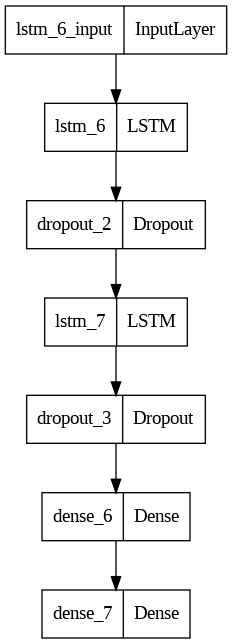

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
history = model.fit(X,result_factorized,epochs=50,validation_split=0.33)

Epoch 1/50
26/26 [==============================] - 4s 28ms/step - loss: 0.6944 - accuracy: 0.5293 - val_loss: 0.6915 - val_accuracy: 0.5358
Epoch 2/50
26/26 [==============================] - 0s 16ms/step - loss: 0.6960 - accuracy: 0.5256 - val_loss: 0.6906 - val_accuracy: 0.5358
Epoch 3/50
26/26 [==============================] - 0s 16ms/step - loss: 0.6911 - accuracy: 0.5195 - val_loss: 0.7068 - val_accuracy: 0.5358
Epoch 4/50
26/26 [==============================] - 0s 14ms/step - loss: 0.6931 - accuracy: 0.5390 - val_loss: 0.6903 - val_accuracy: 0.5358
Epoch 5/50
26/26 [==============================] - 0s 13ms/step - loss: 0.6935 - accuracy: 0.5500 - val_loss: 0.6910 - val_accuracy: 0.5358
Epoch 6/50
26/26 [==============================] - 0s 12ms/step - loss: 0.6873 - accuracy: 0.5415 - val_loss: 0.6903 - val_accuracy: 0.5358
Epoch 7/50
26/26 [==============================] - 0s 11ms/step - loss: 0.6902 - accuracy: 0.5463 - val_loss: 0.6901 - val_accuracy: 0.5358
Epoch 8/50
26

### Below we have shown training and validation Loss as well as Acurracy graph

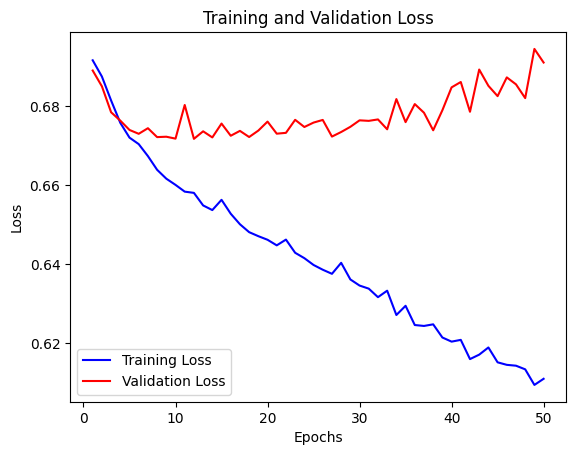

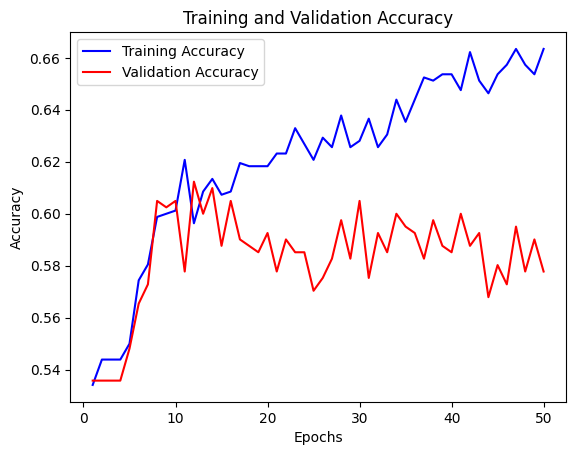

In [ ]:
history_dict = model1.history.history
loss_value = history_dict['loss']
val_loss_value = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(loss_value) + 1)
plt.plot(epochs, loss_value, 'b', label='Training Loss')
plt.plot(epochs, val_loss_value, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
Y_pred = np.argmax(model.predict(X),axis=1)
Y_pred

39/39 [==============================] - 0s 4ms/step


array([0, 0, 0, ..., 0, 0, 0])

### Taking user input for The two teams home and opposition as well as the team which won the toss and on what ground the match is played and further predicting that the home team would win or lose

In [ ]:
# toss
while True:
  try:
    t= int(input("Input toss result 0 or 1: "))
    if t==1 or t==0:
      print("toss value entered successfully...")
      break;
    else:
      print("toss value should be either 0 or 1")
  except ValueError:
    print("Provide an appropriate integer value...")
    continue

#ground
while True:
  try:
    g= int(input("Input ground code (0-96): "))
    if g>=0 and g<=96:
      print("ground code entered successfully...")
      break;
    else:
      print("ground code should be between 0-96")
  except ValueError:
    print("Provide an appropriate integer value...")
    continue

#country
while True:
  try:
    c= int(input("Input home country code(0-16): "))
    if c>=0 or c<=16:
      print("home country code entered successfully...")
      break;
    else:
      print("country code value should be between 0 and 16")
  except ValueError:
    print("Provide an appropriate integer value...")
    continue


#opposition

while True:
  try:
    o= int(input("Input opposition country code(0-16): "))
    if o>=0 or c<=16:
      print("opposition country code entered successfully...")
      break;
    else:
      print("opposition code value should be between 0 and 16")
  except ValueError:
    print("Provide an appropriate integer value...")
    continue

**Here we have taken toss would be won as it has set to be 1 ground to be Kolkata,Country to be India ,Opposition to be Pakistan .The match has been predicted to be won by India.**

In [ ]:
dummyData = [[t,g,c,o]]
np.shape(dummyData)
np.shape(X)
dummyData=np.array(dummyData)
dummyData = np.reshape(dummyData, (dummyData.shape[0], 1, dummyData.shape[1]))
pred = model.predict(dummyData)

print(pred)